In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [37]:
df=pd.read_csv("salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


Text(0, 0.5, 'salary')

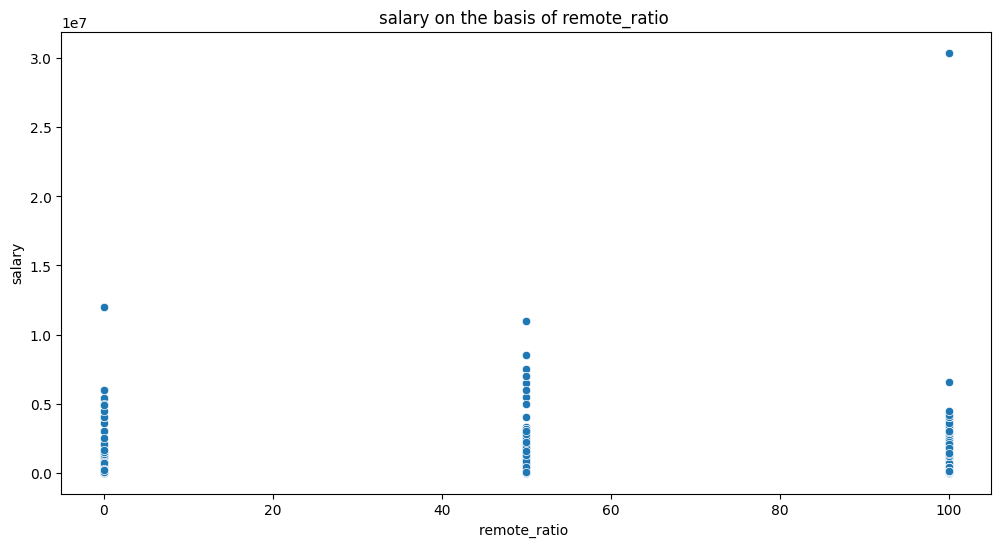

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='remote_ratio',y='salary',data=df)
plt.title("salary on the basis of remote_ratio ")
plt.xlabel('remote_ratio ')
plt.ylabel('salary')


In [40]:
data_scientist_data=df[df['job_title']=='Data Scientist']
data_scientist_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
8,2025,EN,FT,Data Scientist,49363,GBP,62484,GB,0,GB,M
9,2025,EN,FT,Data Scientist,41123,GBP,52054,GB,0,GB,M
10,2025,SE,FT,Data Scientist,234000,USD,234000,US,0,US,M
11,2025,SE,FT,Data Scientist,146000,USD,146000,US,0,US,M
12,2025,SE,FT,Data Scientist,86000,USD,86000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73138,2021,SE,FT,Data Scientist,168000,USD,168000,JP,0,JP,S
73139,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
73143,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
73145,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [41]:
df.shape

(73148, 11)

In [42]:
data_scientist_data.shape

(11443, 11)

In [43]:
data_scientist_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Text(0, 0.5, 'salary')

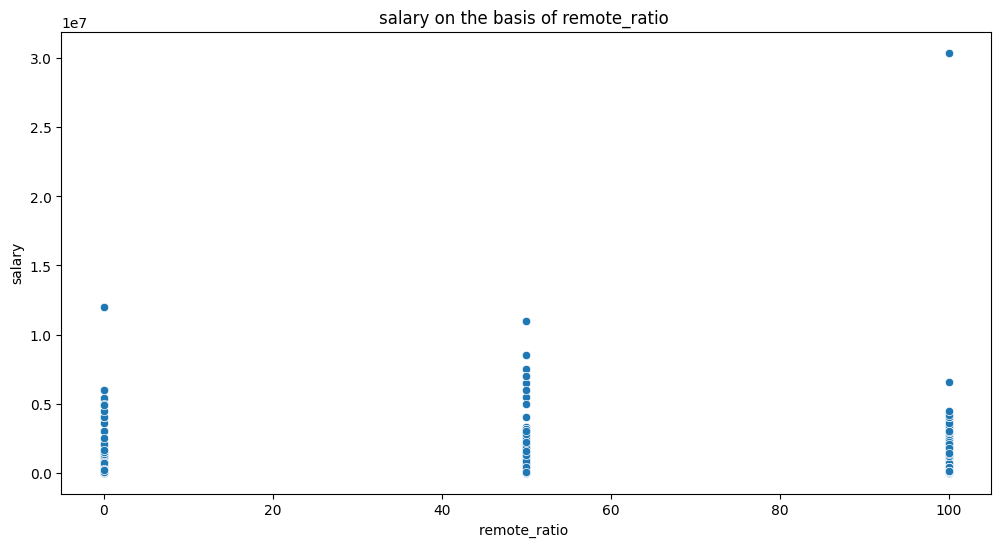

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='remote_ratio',y='salary',data=df)
plt.title("salary on the basis of remote_ratio ")
plt.xlabel('remote_ratio ')
plt.ylabel('salary')


In [45]:
df['experience_level'] = df['experience_level'].map({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
df['employment_type'] = df['employment_type'].map({'PT': 1, 'FT': 2, 'CT': 3, 'FL': 4})
df['company_size'] = df['company_size'].map({'S': 1, 'M': 2, 'L': 3})


In [46]:
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


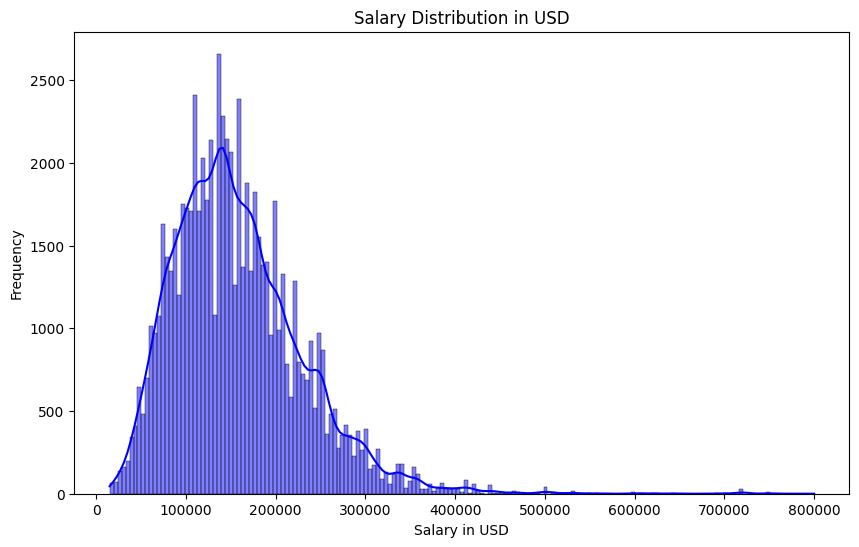

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, color='blue')
plt.title('Salary Distribution in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

In [48]:

X = df[['experience_level']]
y = df['salary_in_usd']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 4888591647.209162
R-squared: 0.09975072439097865


Highest Salary (USD): 800000
Lowest Salary (USD): 15000
Average Salary (USD): 158013.7486192377


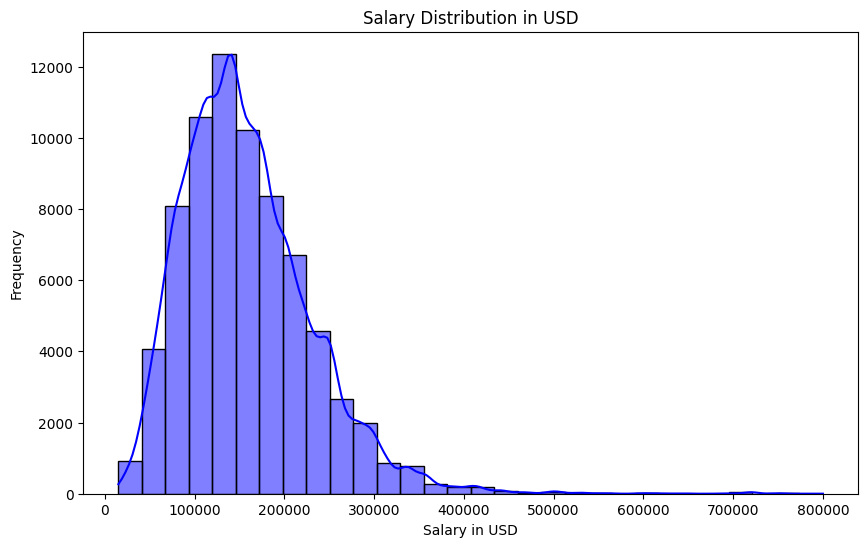

In [ ]:


highest_salary = df['salary_in_usd'].max()
lowest_salary = df['salary_in_usd'].min()
average_salary = df['salary_in_usd'].mean()


print(f"Highest Salary (USD): {highest_salary}")
print(f"Lowest Salary (USD): {lowest_salary}")
print(f"Average Salary (USD): {average_salary}")


plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='blue')
plt.title('Salary Distribution in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

plt.show()

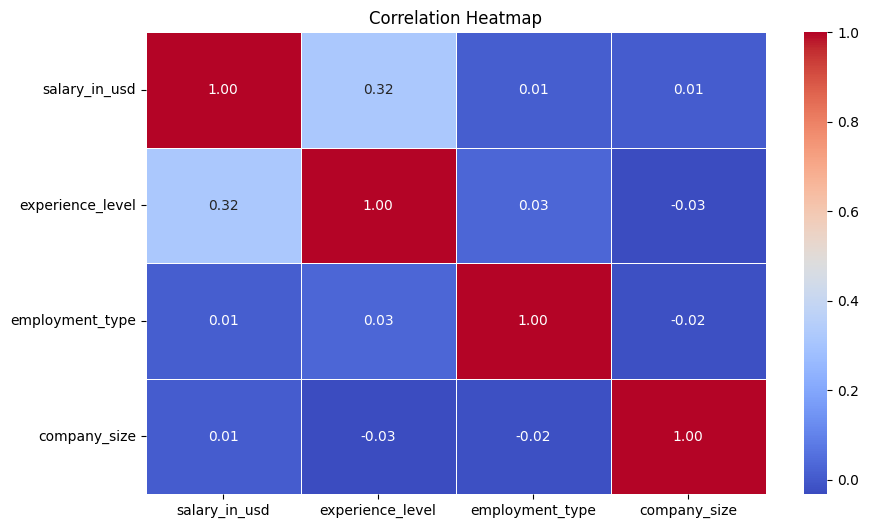

In [50]:
df= df[['salary_in_usd', 'experience_level', 'employment_type', 'company_size']]
correlation_matrix =df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [52]:
df

,salary_in_usd,experience_level,employment_type,company_size
0,170000,3,2,2
1,110000,3,2,2
2,170000,3,2,2
3,110000,3,2,2
4,143000,3,2,2
...,...,...,...,...
73143,412000,3,2,3
73144,151000,2,2,3
73145,105000,1,2,1
73146,100000,1,3,3


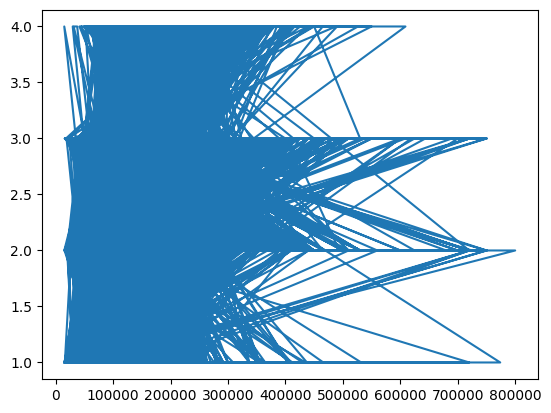

In [54]:
plt.plot(df['salary_in_usd'],df['experience_level'])